Finite Difference Method

In [5]:
import numpy as np
from scipy.stats import norm
import pandas 
import matplotlib.pyplot as plt

Problem 1

In [6]:
stockprices = range(4, 16+1, 1)
def BS(s0, T, X, r, sigma, opt_type):
    d1 = 1/(sigma * np.sqrt(T)) * (np.log(s0/X) + (r + sigma**2/2) * T)
    d2 = d1 - sigma * np.sqrt(T)
    if opt_type == "call":
        price = s0 * norm.cdf(d1) - np.exp(-r*T) * X * norm.cdf(d2)
    else:
        price = np.exp(-r*T) * X * norm.cdf(-d2) - norm.cdf(-d1)*s0
          
    return price

BS_put = [BS(s0 = i, T=0.5, X=10, r=0.04, sigma=0.2, opt_type = "put") for i in stockprices]


a.

In [7]:
# Problem 1
# (a)
def EuroPutEFD(currPrice, delta_coef = 1):
    sigma = 0.2
    r = 0.04
    K = 10.
    T = 0.5
    dt = 0.002
    dx = sigma * np.sqrt(delta_coef * dt)
    M = int(T / dt) # time grid
    N = 200 # space grid
    X_seq = np.linspace(np.log(currPrice) + N/2 * dx, np.log(currPrice) - N/2 * dx, N + 1 )
    
    pu = dt * (sigma**2/float(2 * dx**2) + (r - 0.5 * sigma**2)/float(2 * dx))
    pm = 1 - dt * sigma**2 / float(dx**2) - r * dt
    pd = dt * (sigma**2/float(2 * dx**2) - (r - 0.5 * sigma**2)/float(2 * dx))
    
    A = np.diag(np.repeat(pm, N+1)) + np.diag(np.repeat(pu, N), k = -1) + np.diag(np.repeat(pd, N), k = 1)
    A[0,:] = A[1,:]
    A[-1,:] = A[-2,:]
    
    F = np.zeros((N+1, M+1))
    F[:,-1] = np.maximum(K - np.exp(X_seq), 0)
    
    for i in range(M-1, -1, -1):
        B = np.zeros((N+1))
        B[-1] = - np.exp(X_seq[-1]) + np.exp(X_seq[-2])
        F[:,i] = A @ F[:,i+1] + B
        
    return(F[int(N/2),0])

Using explicit finite method, the European put prices and relative errors are listed below. Put 1 refers to the put prices when $\Delta X = \sigma \sqrt{\Delta t}$, Put 2 refers to the put prices when $\Delta X = \sigma \sqrt{3 \Delta t}$, Put 3 refers to the put prices when $\Delta X = \sigma \sqrt{4\Delta t}$.

In [8]:
EPa_1 = [EuroPutEFD(currPrice = i, delta_coef = 1) for i in stockprices]
EPa_2 = [EuroPutEFD(currPrice = i, delta_coef = 3) for i in stockprices]
EPa_3 = [EuroPutEFD(currPrice = i, delta_coef = 4) for i in stockprices]

df1 = pandas.DataFrame({ '.currPrice' : stockprices,
                        'Put1' : np.array(EPa_1),
                        'Put2' : np.array(EPa_2),
                        'Put3' : np.array(EPa_3), })
df1


,.currPrice,Put1,Put2,Put3
0,4,5.801978,5.801976,5.801976
1,5,4.801978,4.801976,4.801975
2,6,3.802045,3.802046,3.802048
3,7,2.805270,2.805322,2.805350
4,8,1.844271,1.844339,1.844436
5,9,1.024218,1.024418,1.024181
6,10,0.464126,0.464153,0.463878
7,11,0.171822,0.171445,0.171668
8,12,0.052408,0.052486,0.052447
9,13,0.013641,0.013600,0.013724


In [9]:
df1_error = pandas.DataFrame({ '.currPrice' : stockprices,
                        'Error1' : (np.array(EPa_1) - np.array(BS_put))/np.array(BS_put),
                        'Error2' : (np.array(EPa_2) - np.array(BS_put))/np.array(BS_put),
                        'Error3' : (np.array(EPa_3) - np.array(BS_put))/np.array(BS_put),})
df1_error

,.currPrice,Error1,Error2,Error3
0,4,-0.000001,-0.000002,-0.000002
1,5,-0.000002,-0.000002,-0.000002
2,6,-0.000003,-0.000003,-0.000003
3,7,-0.000031,-0.000012,-0.000003
4,8,0.000001,0.000038,0.000091
5,9,-0.000205,-0.000010,-0.000242
6,10,-0.001223,-0.001166,-0.001757
7,11,0.001661,-0.000535,0.000767
8,12,-0.000977,0.000509,-0.000237
9,13,-0.000734,-0.003723,0.005357


b.

In [10]:
def EuroPutIFD(currPrice, delta_coef = 1):
    sigma = 0.2
    r = 0.04
    K = 10.
    T = 0.5
    dt = 0.002
    dx = sigma * np.sqrt(delta_coef * dt)
    M = int(T / dt) # time grid
    N = 200 # space grid
    X_seq = np.linspace(np.log(currPrice) + N/2 * dx, np.log(currPrice) - N/2 * dx, N + 1 )
    
    pu = - 0.5 * dt * (sigma**2/float(dx**2) + (r - 0.5 * sigma**2)/float(dx))
    pm = 1 + dt * sigma**2 / float(dx**2) + r * dt
    pd = - 0.5 * dt * (sigma**2/float(dx**2) - (r - 0.5 * sigma**2)/float(dx))
    
    A = np.diag(np.repeat(pm, N+1)) + np.diag(np.repeat(pu, N), k = -1) + np.diag(np.repeat(pd, N), k = 1)
    A[0, :2] = [1, -1]
    A[-1,N-1:] = [1, -1]
    
    F = np.zeros((N+1, M+1))
    F[:,-1] = np.maximum(K - np.exp(X_seq), 0)
    
    for i in range(M-1, -1, -1):
        B = F[:,i+1]
        B[0] = 0
        B[-1] = np.exp(X_seq[-1]) - np.exp(X_seq[-2])
        F[:,i] = np.linalg.inv(A) @ B
        
    return(F[int(N/2),0])

Using implicit finite method, the European put prices and relative errors are listed below. Put 1 refers to the put prices when $\Delta X = \sigma \sqrt{\Delta t}$, Put 2 refers to the put prices when $\Delta X = \sigma \sqrt{3 \Delta t}$, Put 3 refers to the put prices when $\Delta X = \sigma \sqrt{4\Delta t}$.

In [11]:
EPb_1 = [EuroPutIFD(currPrice = i, delta_coef = 1) for i in stockprices]
EPb_2 = [EuroPutIFD(currPrice = i, delta_coef = 3) for i in stockprices]
EPb_3 = [EuroPutIFD(currPrice = i, delta_coef = 4) for i in stockprices]

df2 = pandas.DataFrame({ '.currPrice' : stockprices,
                        'Put1' : np.array(EPb_1),
                        'Put2' : np.array(EPb_2),
                        'Put3' : np.array(EPb_3), })
df2

,.currPrice,Put1,Put2,Put3
0,4,5.801994,5.801992,5.801991
1,5,4.801994,4.801992,4.801991
2,6,3.802074,3.802075,3.802078
3,7,2.805471,2.805503,2.805530
4,8,1.844461,1.844692,1.844788
5,9,1.024367,1.024317,1.024080
6,10,0.464142,0.463592,0.463317
7,11,0.171381,0.171130,0.171354
8,12,0.052532,0.052548,0.052510
9,13,0.013770,0.013764,0.013887


In [12]:
df2_error = pandas.DataFrame({ '.currPrice' : stockprices,
                        'Error1' : (np.array(EPb_1) - np.array(BS_put))/np.array(BS_put),
                        'Error2' : (np.array(EPb_2) - np.array(BS_put))/np.array(BS_put),
                        'Error3' : (np.array(EPb_3) - np.array(BS_put))/np.array(BS_put),})
df2_error

,.currPrice,Error1,Error2,Error3
0,4,0.000001,9.378169e-07,7.999323e-07
1,5,0.000001,1.036915e-06,8.343113e-07
2,6,0.000004,4.556331e-06,5.319061e-06
3,7,0.000041,5.185071e-05,6.160986e-05
4,8,0.000104,2.294221e-04,2.817319e-04
5,9,-0.000060,-1.085712e-04,-3.398859e-04
6,10,-0.001190,-2.372348e-03,-2.964866e-03
7,11,-0.000911,-2.370133e-03,-1.065492e-03
8,12,0.001385,1.688911e-03,9.508886e-04
9,13,0.008705,8.273982e-03,1.729345e-02


c.

In [13]:
def EuroPutCN(currPrice, delta_coef = 1):
    sigma = 0.2
    r = 0.04
    K = 10.
    T = 0.5
    dt = 0.002
    dx = sigma * np.sqrt(delta_coef * dt)
    M = int(T / dt) # time grid
    N = 200 # space grid
    X_seq = np.linspace(np.log(currPrice) + N/2 * dx, np.log(currPrice) - N/2 * dx, N + 1 )
    
    pu = - 0.25 * dt * (sigma**2/float(dx**2) + (r - 0.5 * sigma**2)/float(dx))
    pm = 1 + dt * sigma**2 / float(2 * dx**2) + r * dt/2.
    pd = - 0.25 * dt * (sigma**2/float(dx**2) - (r - 0.5 * sigma**2)/float(dx))
    
    A = np.diag(np.repeat(pm, N+1)) + np.diag(np.repeat(pu, N), k = -1) + np.diag(np.repeat(pd, N), k = 1)
    A[0, :2] = [1, -1]
    A[-1,N-1:] = [1, -1]
    
    F = np.zeros((N+1, M+1))
    F[:,-1] = np.maximum(K - np.exp(X_seq), 0)
    
    temp = np.diag(np.repeat(-(pm-2), N+1)) + np.diag(np.repeat(-pu, N), k = -1) + np.diag(np.repeat(-pd, N), k = 1)
    temp[0, :] = 0
    temp[-1,:] = 0
    
    
    for i in range(M-1, -1, -1):
        Z = temp @ F[:,i+1]
        Z[-1] = np.exp(X_seq[-1]) - np.exp(X_seq[-2])   
        F[:,i] = np.linalg.inv(A) @ Z
     
    return(F[int(N/2),0])

Using Crank-Nicolson finite method, the European put prices and relative errors are listed below. Put 1 refers to the put prices when $\Delta X = \sigma \sqrt{\Delta t}$, Put 2 refers to the put prices when $\Delta X = \sigma \sqrt{3 \Delta t}$, Put 3 refers to the put prices when $\Delta X = \sigma \sqrt{4\Delta t}$.

In [14]:
EPc_1 = [EuroPutCN(currPrice = i, delta_coef = 1) for i in stockprices]
EPc_2 = [EuroPutCN(currPrice = i, delta_coef = 3) for i in stockprices]
EPc_3 = [EuroPutCN(currPrice = i, delta_coef = 4) for i in stockprices]


df3 = pandas.DataFrame({ '.currPrice' : stockprices,
                        'Put1' : np.array(EPc_1),
                        'Put2' : np.array(EPc_2),
                        'Put3' : np.array(EPc_3), })
df3


,.currPrice,Put1,Put2,Put3
0,4,5.801986,5.801984,5.801984
1,5,4.801986,4.801984,4.801983
2,6,3.802059,3.802060,3.802063
3,7,2.805381,2.805413,2.805440
4,8,1.844284,1.844515,1.844612
5,9,1.024418,1.024367,1.024130
6,10,0.464421,0.463873,0.463598
7,11,0.171538,0.171287,0.171511
8,12,0.052501,0.052517,0.052478
9,13,0.013688,0.013682,0.013806


In [15]:
df3_error = pandas.DataFrame({ '.currPrice' : stockprices,
                        'Error1' : (np.array(EPc_1) - np.array(BS_put))/np.array(BS_put),
                        'Error2' : (np.array(EPc_2) - np.array(BS_put))/np.array(BS_put),
                        'Error3' : (np.array(EPc_3) - np.array(BS_put))/np.array(BS_put),})
df3_error

,.currPrice,Error1,Error2,Error3
0,4,-1.378830e-07,-4.136707e-07,-5.515564e-07
1,5,-2.038913e-07,-6.114002e-07,-8.147825e-07
2,6,2.511715e-07,6.394643e-07,1.367513e-06
3,7,8.380227e-06,1.974280e-05,2.954651e-05
4,8,8.397904e-06,1.337717e-04,1.861947e-04
5,9,-1.005597e-05,-5.949919e-05,-2.910272e-04
6,10,-5.882509e-04,-1.768664e-03,-2.360233e-03
7,11,6.714397e-06,-1.454057e-03,-1.506550e-04
8,12,7.972365e-04,1.094695e-03,3.526474e-04
9,13,2.715726e-03,2.289321e-03,1.133889e-02


Comment:

Comparing the relative errors of three methods, Crank-Nicolson method produces the most presice estimations of option prices.
We also find that finite difference methods have better performance when estimating in-the-money options relative to out-of-the-money options.



Problem 2

a. Explicit Finite Method

In [16]:
def AmericanEFD(currPrice, opt_type, ds = 0.5):
    sigma = 0.2
    r = 0.04
    K = 10.
    T = 0.5
    dt = 0.002
    M = int(T / dt) # time grid
    N = 50 # space grid
    S_seq = np.arange(50*ds, -ds, -ds)
    j = np.arange(N-1, 0, -1, dtype = np.float)
    pu = 0.5 * dt * (r * j + sigma**2 * j**2)
    pm = 1 - dt * (sigma**2 * j**2 + r)
    pd = 0.5 * dt * (-r * j + sigma**2 * j**2)
    A = np.zeros((N+1, N+1))
    for i in range(1, N):
        A[i,i-1:i+2] = pu[i-1], pm[i-1], pd[i-1]
    A[0,:] = A[1,:]
    A[-1,:] = A[-2,:]
     
    F = np.zeros((N+1, M+1))
    
    if opt_type == "call":
        F[:,-1] = np.maximum(S_seq - K, 0) 
        B = np.zeros((N+1))
        B[0] = S_seq[0] - S_seq[-1] 
        for i in range(M-1, -1, -1):         
            F[:,i] = A @ F[:,i+1] + B
            F[:,i] = np.maximum(F[:,i], F[:,-1])
    
    else:
        F[:,-1] = np.maximum(K - S_seq, 0)
        B = np.zeros((N+1))
        B[-1] = - S_seq[-1] + S_seq[-2]
        for i in range(M-1, -1, -1):
            F[:,i] = A @ F[:,i+1] + B
            F[:,i] = np.maximum(F[:,i], F[:,-1])
    
    optprices = F[:,0]
    return np.interp(currPrice, S_seq[::-1], optprices[::-1])

In [17]:
Pa_1 = [AmericanEFD(currPrice = i, opt_type = "put", ds = 0.5 ) for i in stockprices]
Pa_2 = [AmericanEFD(currPrice = i, opt_type = "put", ds = 1. ) for i in stockprices]
Pa_3 = [AmericanEFD(currPrice = i, opt_type = "put", ds = 1.5 ) for i in stockprices]

Ca_1 = [AmericanEFD(currPrice = i, opt_type = "call", ds = 0.5 ) for i in stockprices]
Ca_2 = [AmericanEFD(currPrice = i, opt_type = "call", ds = 1. ) for i in stockprices]
Ca_3 = [AmericanEFD(currPrice = i, opt_type = "call", ds = 1.5 ) for i in stockprices]


b. Implict Finite Method

In [18]:
def AmericanIFD(currPrice, opt_type, ds = 0.5):
    sigma = 0.2
    r = 0.04
    K = 10.
    T = 0.5
    dt = 0.002
    M = int(T / dt) # time grid
    N = 50 # space grid
    S_seq = np.arange(50*ds, -ds, -ds)
    j = np.arange(N-1, 0, -1, dtype = np.float)
    pu = -0.5 * dt * (r * j + sigma**2 * j**2)
    pm = 1 + dt * (sigma**2 * j**2 + r)
    pd = -0.5 * dt * (-r * j + sigma**2 * j**2)
    A = np.zeros((N+1, N+1))
    for i in range(1, N):
        A[i,i-1:i+2] = pu[i-1], pm[i-1], pd[i-1]
    A[0,:2] = [1,-1]
    A[-1,N-1:] = [1,-1]
     
    F = np.zeros((N+1, M+1))
    
    if opt_type == "call":
        F[:,-1] = np.maximum(S_seq - K, 0) 
        
        for i in range(M-1, -1, -1):
            B = F[:,i+1]
            B[0] = S_seq[0] - S_seq[-1] 
            B[-1] = 0
            F[:,i] = np.linalg.inv(A) @ B
            F[:,i] = np.maximum(F[:,i], F[:,-1])
    
    else:
        F[:,-1] = np.maximum(K - S_seq, 0)

        for i in range(M-1, -1, -1):
            B = F[:,i+1]
            B[0] = 0
            B[-1] = S_seq[-1] - S_seq[-2]
            F[:,i] = np.linalg.pinv(A) @ B
            
            F[:,i] = np.maximum(F[:,i], F[:,-1])
    
    optprices = F[:,0]
    return np.interp(currPrice, S_seq[::-1], optprices[::-1])

In [19]:
Pb_1 = [AmericanIFD(currPrice = i, opt_type = "put", ds = 0.5 ) for i in stockprices]
Pb_2 = [AmericanIFD(currPrice = i, opt_type = "put", ds = 1. ) for i in stockprices]
Pb_3 = [AmericanIFD(currPrice = i, opt_type = "put", ds = 1.5 ) for i in stockprices]

Cb_1 = [AmericanIFD(currPrice = i, opt_type = "call", ds = 0.5 ) for i in stockprices]
Cb_2 = [AmericanIFD(currPrice = i, opt_type = "call", ds = 1. ) for i in stockprices]
Cb_3 = [AmericanIFD(currPrice = i, opt_type = "call", ds = 1.5 ) for i in stockprices]



c. Crank-Nicolson Method

In [20]:
def AmericanCN(currPrice, opt_type, ds = 0.5):
    sigma = 0.2
    r = 0.04
    K = 10.
    T = 0.5
    dt = 0.002
    M = int(T / dt) # time grid
    N = 50 # space grid
    S_seq = np.arange(50*ds, -ds, -ds)
    j = np.arange(N-1, 0, -1, dtype = np.float)
    pu = -0.25 * dt * (r * j + sigma**2 * j**2)
    pm = 1 + 0.5 * dt * (sigma**2 * j**2 + r)
    pd = -0.25 * dt * (-r * j + sigma**2 * j**2)
   
    A = np.zeros((N+1, N+1))
    temp = np.zeros((N+1, N+1))
    for i in range(1, N):
        A[i,i-1:i+2] = pu[i-1], pm[i-1], pd[i-1]
        temp[i,i-1:i+2] = -pu[i-1], -pm[i-1] + 2, -pd[i-1]
    
    A[0,:2] = [1,-1]
    A[-1,N-1:] = [1,-1]
    
     
    F = np.zeros((N+1, M+1))
    
    if opt_type == "call":
        F[:,-1] = np.maximum(S_seq - K, 0) 
        for i in range(M-1, -1, -1):
            Z = temp @ F[:,i+1]
            Z[0] = S_seq[0] - S_seq[1]
            F[:,i] = np.linalg.inv(A) @ Z
            F[:,i] = np.maximum(F[:,i], F[:,-1])
    
    else:
        F[:,-1] = np.maximum(K - S_seq, 0)
        for i in range(M-1, -1, -1):
            Z = temp @ F[:,i+1]
            Z[-1] = S_seq[-1] - S_seq[-2]
            F[:,i] = np.linalg.inv(A) @ Z
            F[:,i] = np.maximum(F[:,i], F[:,-1])            

    
    optprices = F[:,0]
    return np.interp(currPrice, S_seq[::-1], optprices[::-1])

In [21]:
Pc_1 = [AmericanCN(currPrice = i, opt_type = "put", ds = 0.5 ) for i in stockprices]
Pc_2 = [AmericanCN(currPrice = i, opt_type = "put", ds = 1. ) for i in stockprices]
Pc_3 = [AmericanCN(currPrice = i, opt_type = "put", ds = 1.5 ) for i in stockprices]

Cc_1 = [AmericanCN(currPrice = i, opt_type = "call", ds = 0.5 ) for i in stockprices]
Cc_2 = [AmericanCN(currPrice = i, opt_type = "call", ds = 1. ) for i in stockprices]
Cc_3 = [AmericanCN(currPrice = i, opt_type = "call", ds = 1.5 ) for i in stockprices]


$\Delta S = 0.5$,

In [22]:
df_a = pandas.DataFrame({'.currPrice' : stockprices,
                        'Call, EFD' : Ca_1,
                        'Call, IFD' : Cb_1,
                        'Call, CN' : Cc_1,
                        'Put, EFD' : Pa_1,
                        'Put, IFD' : Pb_1,
                        'Put,CN' : Pc_1,
                        })
round(df_a, 6)

,.currPrice,"Call, CN","Call, EFD","Call, IFD","Put, EFD","Put, IFD","Put,CN"
0,4,0.000000,0.000000,0.000000,6.000000,6.000000,6.000000
1,5,0.000003,0.000003,0.000003,5.000000,5.000000,5.000000
2,6,0.000177,0.000168,0.000186,4.000000,4.000000,4.000000
3,7,0.004132,0.004055,0.004209,3.000000,3.000000,3.000000
4,8,0.042232,0.042061,0.042403,2.000000,2.000000,2.000000
5,9,0.216630,0.216680,0.216581,1.075747,1.075205,1.075475
6,10,0.653738,0.654040,0.653436,0.473328,0.472453,0.472889
7,11,1.364000,1.364163,1.363842,0.170676,0.170268,0.170470
8,12,2.248851,2.248849,2.248930,0.051867,0.051919,0.051893
9,13,3.211619,3.211927,3.212251,0.013756,0.013913,0.013835


$\Delta S = 1.0$,

In [23]:
df_b = pandas.DataFrame({'.currPrice' : stockprices,
                        'Call, EFD' : Ca_2,
                        'Call, IFD' : Cb_2,
                        'Call, CN' : Cc_2,
                        'Put, EFD' : Pa_2,
                        'Put, IFD' : Pb_2,
                        'Put,CN' : Pc_2,
                        })
round(df_b, 6)

,.currPrice,"Call, CN","Call, EFD","Call, IFD","Put, EFD","Put, IFD","Put,CN"
0,4,0.000001,0.000001,0.000001,6.000000,6.000000,6.000000
1,5,0.000028,0.000026,0.000029,5.000000,5.000000,5.000000
2,6,0.000519,0.000507,0.000532,4.000000,4.000000,4.000000
3,7,0.005958,0.005889,0.006026,3.000000,3.000000,3.000000
4,8,0.043075,0.042916,0.043232,2.000000,2.000000,2.000000
5,9,0.201049,0.201045,0.201054,1.051627,1.051252,1.051439
6,10,0.622670,0.623048,0.622291,0.439979,0.439081,0.439530
7,11,1.348002,1.348126,1.347879,0.154452,0.154173,0.154312
8,12,2.245033,2.244985,2.245081,0.048152,0.048255,0.048203
9,13,3.211654,3.211588,3.211718,0.013876,0.014022,0.013949


$\Delta S = 1.5$,

In [24]:
df_c = pandas.DataFrame({'.currPrice' : stockprices,
                        'Call, EFD' : Ca_3,
                        'Call, IFD' : Cb_3,
                        'Call, CN' : Cc_3,
                        'Put, EFD' : Pa_3,
                        'Put, IFD' : Pb_3,
                        'Put,CN' : Pc_3,
                        })
round(df_c, 6)

,.currPrice,"Call, CN","Call, EFD","Call, IFD","Put, EFD","Put, IFD","Put,CN"
0,4,0.000037,0.000036,0.000038,6.000000,6.000000,6.000000
1,5,0.000654,0.000647,0.000661,5.000000,5.000000,5.000000
2,6,0.001851,0.001833,0.001870,4.000000,4.000000,4.000000
3,7,0.020274,0.020207,0.020341,3.000000,3.000000,3.000000
4,8,0.098379,0.098320,0.098437,2.019822,2.019792,2.019807
5,9,0.236165,0.236171,0.236159,1.059465,1.059376,1.059420
6,10,0.731354,0.731521,0.731187,0.542313,0.541969,0.542141
7,11,1.405557,1.405717,1.405398,0.209507,0.209210,0.209358
8,12,2.258775,2.258759,2.258791,0.061046,0.061099,0.061072
9,13,3.226145,3.226111,3.226179,0.028218,0.028304,0.028261


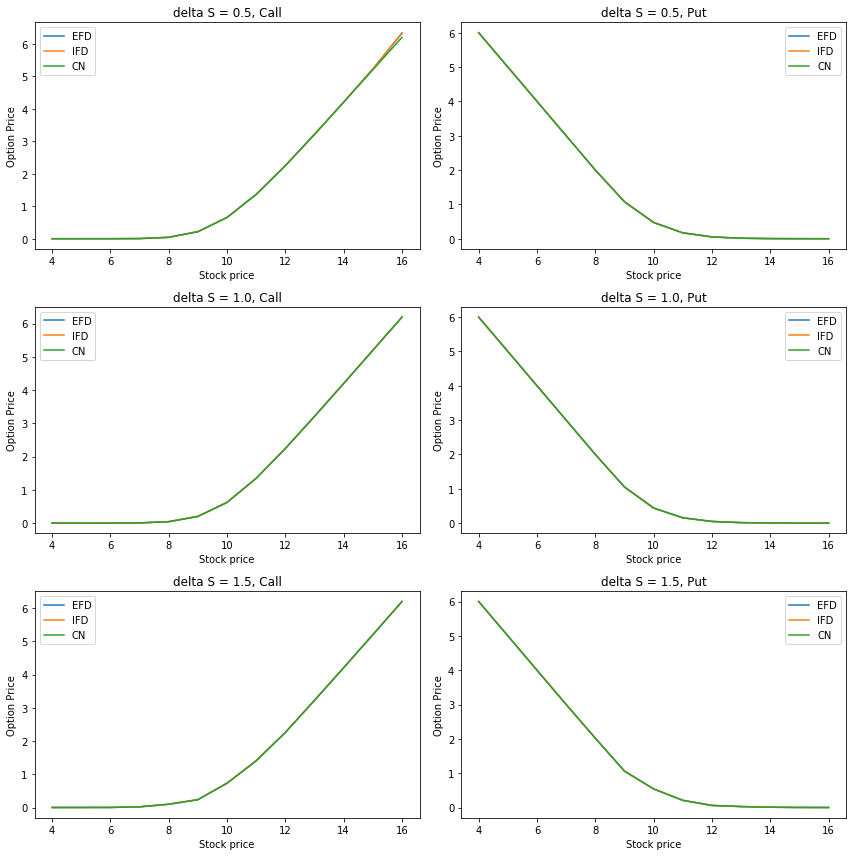

In [25]:
plt.figure(figsize=(12,12))
plt.subplot(321)
plt.plot(stockprices, Ca_1, label = "EFD")
plt.plot(stockprices, Cb_1, label = "IFD")
plt.plot(stockprices, Cc_1, label = "CN")
plt.legend()
plt.xlabel("Stock price")
plt.ylabel("Option Price")
plt.title("delta S = 0.5, Call")

plt.subplot(322)
plt.plot(stockprices, Pa_1, label = "EFD")
plt.plot(stockprices, Pb_1, label = "IFD")
plt.plot(stockprices, Pc_1, label = "CN")
plt.legend()
plt.title("delta S = 0.5, Put")
plt.ylabel("Option Price")
plt.xlabel("Stock price")

plt.subplot(323)
plt.plot(stockprices, Ca_2, label = "EFD")
plt.plot(stockprices, Cb_2, label = "IFD")
plt.plot(stockprices, Cc_2, label = "CN")
plt.legend()
plt.xlabel("Stock price")
plt.ylabel("Option Price")
plt.title("delta S = 1.0, Call")

plt.subplot(324)
plt.plot(stockprices, Pa_2, label = "EFD")
plt.plot(stockprices, Pb_2, label = "IFD")
plt.plot(stockprices, Pc_2, label = "CN")
plt.legend()
plt.title("delta S = 1.0, Put")
plt.ylabel("Option Price")
plt.xlabel("Stock price")

plt.subplot(325)
plt.plot(stockprices, Ca_3, label = "EFD")
plt.plot(stockprices, Cb_3, label = "IFD")
plt.plot(stockprices, Cc_3, label = "CN")
plt.legend()
plt.xlabel("Stock price")
plt.ylabel("Option Price")
plt.title("delta S = 1.5, Call")


plt.subplot(326)
plt.plot(stockprices, Pa_3, label = "EFD")
plt.plot(stockprices, Pb_3, label = "IFD")
plt.plot(stockprices, Pc_3, label = "CN")
plt.legend()
plt.title("delta S = 1.5, Put")
plt.ylabel("Option Price")
plt.xlabel("Stock price")

plt.tight_layout()
plt.show()

As shown in the graphs above, the option prices estimated by EFD, IFD, and CN are almost the same for a given $\Delta S$.

Comment: I generated grid for stock prices $S_0 = {0, \Delta S, 2\Delta S, ..., 50\Delta S}$. To price American options, price at each node is compared to early exercise value and the larger one is taken. To extract option value for each currPrice, interpolation method is used since we cannot guarantee a perfect match between the currPrice and stock price grid (especially when $\Delta S = 1.5$). It is worth mentioning that interpolation may lead to some extent of imprecision.